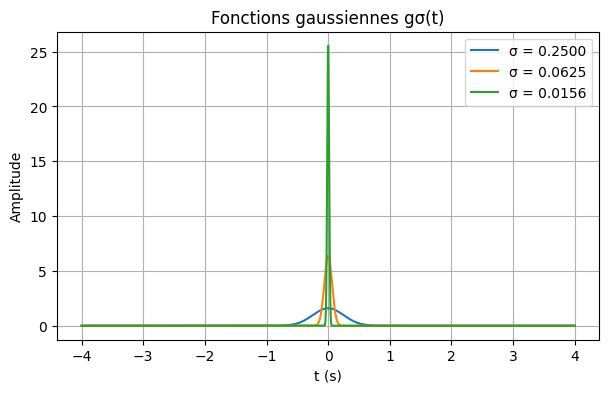

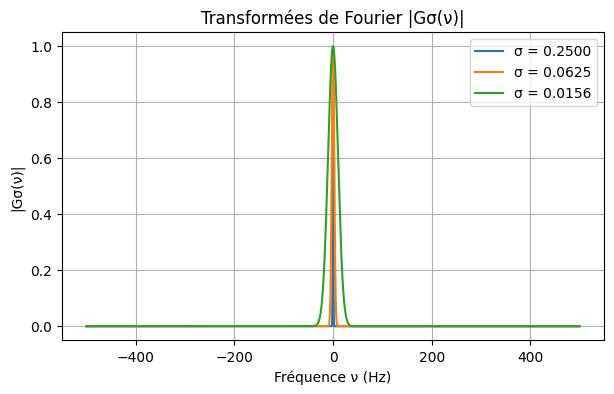

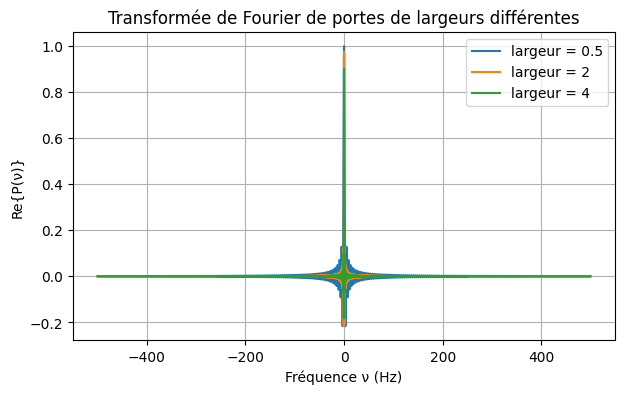

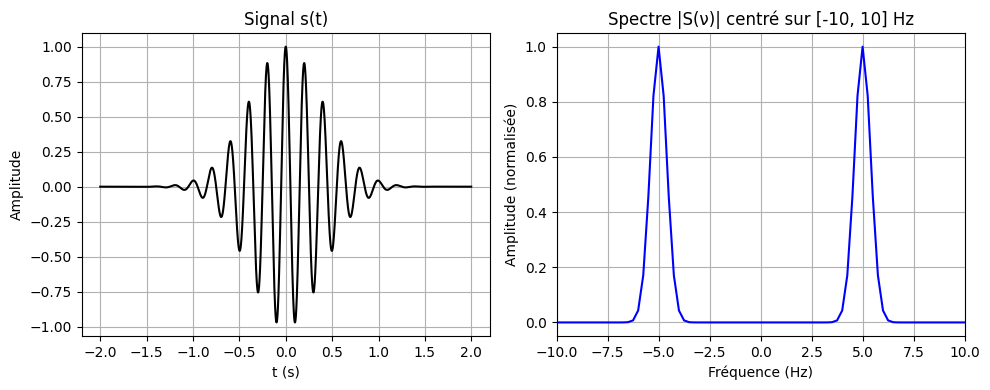

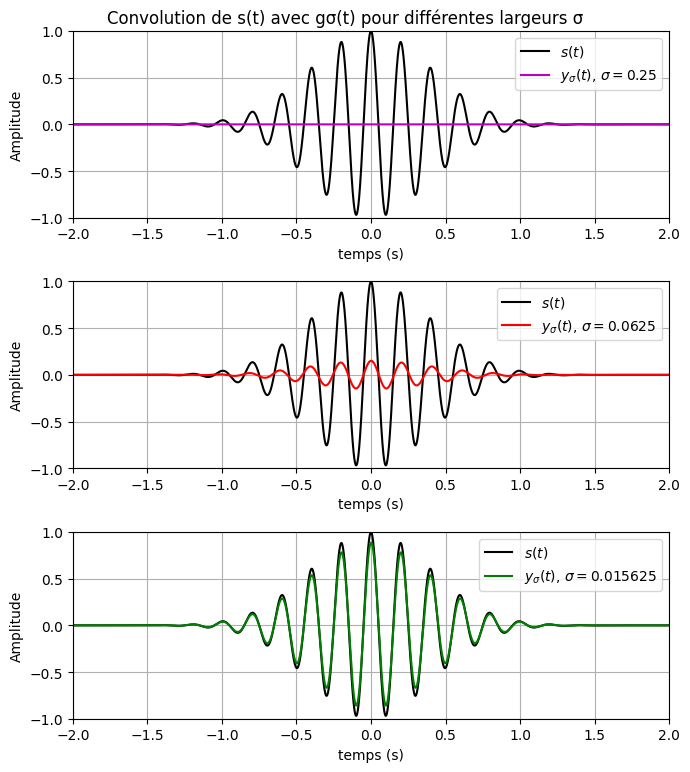

In [14]:
# ============================================================
# TP M-ANA – Exercice 6 : Distribution de Dirac
# Version finale (spectre centré sur [-10, 10])
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Fonctions utiles
# ============================================================

def g_sigma(t, sigma):
    """Gaussienne centrée de largeur σ, aire ≈ 1."""
    g = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-t**2 / (2*sigma**2))
    g /= np.trapezoid(g, t)   # normalisation continue discrète
    return g

def porte(t, largeur):
    """Fonction porte de largeur donnée."""
    return np.where(np.abs(t) <= largeur/2, 1/largeur, 0)

def s(t, nu0=5):
    """Signal s(t) = e^(-πt²) * cos(2πν₀t)."""
    return np.exp(-np.pi*t**2) * np.cos(2*np.pi*nu0*t)

# ============================================================
# Paramètres
# ============================================================

Te = 0.001                 # pas d’échantillonnage
t = np.arange(-4, 4, Te)
nu_e = 1/Te
N = len(t)
nu = np.linspace(-nu_e/2, nu_e/2, N)
sigmas = [0.25, 0.0625, 0.015625]

# ============================================================
# PARTIE A – Limite d'une série de fonctions continues
# ============================================================

# --- 1) gσ(t) ---
plt.figure(figsize=(7,4))
for sigma in sigmas:
    plt.plot(t, g_sigma(t, sigma), label=f"σ = {sigma:.4f}")
plt.title("Fonctions gaussiennes gσ(t)")
plt.xlabel("t (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# --- 2) Transformées de Fourier des gσ(t) ---
plt.figure(figsize=(7,4))
for sigma in sigmas:
    G = np.exp(-2*(np.pi*sigma*nu)**2)
    plt.plot(nu, G, label=f"σ = {sigma:.4f}")
plt.title("Transformées de Fourier |Gσ(ν)|")
plt.xlabel("Fréquence ν (Hz)")
plt.ylabel("|Gσ(ν)|")
plt.legend()
plt.grid(True)
plt.show()

# --- 3) Étude avec des fonctions porte ---
larg_portes = [0.5, 2, 4]
plt.figure(figsize=(7,4))
for L in larg_portes:
    P = np.sinc(L * nu)
    plt.plot(nu, P, label=f"largeur = {L}")
plt.title("Transformée de Fourier de portes de largeurs différentes")
plt.xlabel("Fréquence ν (Hz)")
plt.ylabel("Re{P(ν)}")
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# PARTIE B – Convolution par un Dirac
# ============================================================

t2 = np.arange(-2, 2, Te)
s_t = s(t2)

# --- 1) Signal s(t) et spectre centré sur [-10, 10] ---
S = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(s_t)))
freq = np.fft.fftshift(np.fft.fftfreq(len(s_t), Te))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(t2, s_t, 'k')
plt.title("Signal s(t)")
plt.xlabel("t (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(freq, np.abs(S)/np.max(np.abs(S)), 'b')
plt.xlim(-10, 10)  # 🔹 centrage du spectre
plt.title("Spectre |S(ν)| centré sur [-10, 10] Hz")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude (normalisée)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 2) Convolution s * gσ ---
colors = ['m', 'r', 'g']
plt.figure(figsize=(7,8))
for i, sigma in enumerate(sigmas):
    g = g_sigma(t2, sigma)
    y = np.convolve(s_t, g, mode='same') * Te
    plt.subplot(3,1,i+1)
    plt.plot(t2, s_t, 'k', label=r'$s(t)$')
    plt.plot(t2, y, color=colors[i], label=rf'$y_\sigma(t)$, $\sigma = {sigma}$')
    plt.xlim(-2, 2)
    plt.ylim(-1, 1)
    plt.xlabel('temps (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()
plt.suptitle("Convolution de s(t) avec gσ(t) pour différentes largeurs σ", y=0.96)
plt.tight_layout()
plt.show()

# ============================================================
# Commentaires :
# ============================================================
# - Le spectre |S(ν)| est maintenant centré sur [-10, 10] Hz comme dans le sujet.
# - Quand σ diminue, gσ(t) devient plus fine et tend vers une Dirac δ(t).
# - La convolution s * gσ agit comme un filtrage passe-bas :
#     * σ = 0.25 → signal lissé.
#     * σ = 0.0625 → atténuation modérée.
#     * σ = 0.015625 → presque identique à s(t).
# ============================================================
